### Bagging Concept 
-  Generate multiple datasets by sampling with replacement 
(bootstrap) 
-  Train a separate model on each dataset 
-  Aggregate predictions (average for regression, majority 
vote for classification) 

# Bagging (Bootstrap Aggregating) 
---

## 1. Why Bagging is Needed

Many machine learning models, especially **decision trees**, are **high-variance** learners.  
This means:

- Small changes in training data can lead to **large changes in the model**
- The model may fit noise instead of the underlying pattern
- Predictions become unstable and unreliable

Bagging is designed to **reduce variance** without increasing bias too much.

---

## 2. Core Idea of Bagging

Bagging stands for **Bootstrap Aggregating**.

The idea is simple:

> Train many models on slightly different versions of the same dataset and then combine their predictions.

Instead of trusting a single unstable model, bagging relies on the **wisdom of the crowd**.

---

## 3. Bootstrap Sampling

Bootstrap sampling means:
- Sampling **with replacement**
- Each bootstrap dataset has the **same size** as the original dataset
- Some data points appear multiple times
- Some data points are not selected at all

### Why sampling with replacement?

Sampling with replacement ensures:
- Each model sees a **different dataset**
- Models become **diverse**
- Diversity is essential for effective ensemble learning

### Key property

On average:
- About **63%** of original samples appear in a bootstrap dataset
- About **37%** are left out (called **Out-of-Bag samples**)

---

## 4. Training Multiple Models

For each bootstrap dataset:
- Train an **independent base model**
- All models use the **same learning algorithm**
- Differences arise only due to different training samples

Common base learners:
- Decision Trees (most common)
- Linear models
- Neural networks (rare, costly)

Bagging works best with **high-variance, low-bias models**.

---

## 5. Aggregation of Predictions

### Classification

For classification problems:
- Each model predicts a class label
- Final prediction is decided by **majority voting**

$$
\hat{y} = \text{mode}\{ \hat{y}_1, \hat{y}_2, \ldots, \hat{y}_M \}
$$

### Regression

For regression problems:
- Each model predicts a numeric value
- Final prediction is the **average**

$$
\hat{y} = \frac{1}{M} \sum_{i=1}^{M} \hat{y}_i
$$

---

## 6. Why Bagging Works (Intuition)

If individual models make **uncorrelated errors**:

- Errors cancel each other out when averaged
- Noise effects are reduced
- Predictions become smoother and more stable

### Bias–Variance Perspective

| Aspect | Effect of Bagging |
|-----|------------------|
| Bias | Slight change or unchanged |
| Variance | Strongly reduced |
| Overfitting | Reduced |
| Stability | Improved |

Bagging **does not** fix underfitting problems.

---

## 7. Out-of-Bag (OOB) Error

Since each model:
- Does not see ~37% of data points
- Those points can act as a **validation set**

Out-of-Bag error:
- Estimates generalization performance
- Eliminates the need for a separate validation set

This is one of the hidden strengths of bagging.

---

## 8. Bagging vs Single Model

| Feature | Single Model | Bagging |
|------|-------------|--------|
| Variance | High | Low |
| Overfitting | Likely | Reduced |
| Robustness | Low | High |
| Computation | Cheap | Expensive |
| Interpretability | Easy | Hard |

---

## 9. Bagging vs Boosting (Quick Contrast)

| Aspect | Bagging | Boosting |
|------|--------|---------|
| Data Sampling | Random (bootstrap) | Adaptive |
| Focus | Variance reduction | Bias reduction |
| Model Dependency | Independent | Sequential |
| Noise Sensitivity | Robust | Sensitive |

---

## 10. Practical Takeaways

- Use bagging when your model is **unstable**
- Decision trees benefit the most
- More models → better stability (up to a limit)
- Bagging is the foundation of **Random Forests**

---

## 11. Mental Model

Think of bagging as:
> Asking the same question to many slightly different experts and trusting the consensus rather than one opinion.

---

## 12. One-Liner Summary

***Bagging reduces variance by training multiple models on bootstrapped datasets and aggregating their predictions.***


Single Tree Accuracy:  0.7866666666666666
Bagging Accuracy:  0.78


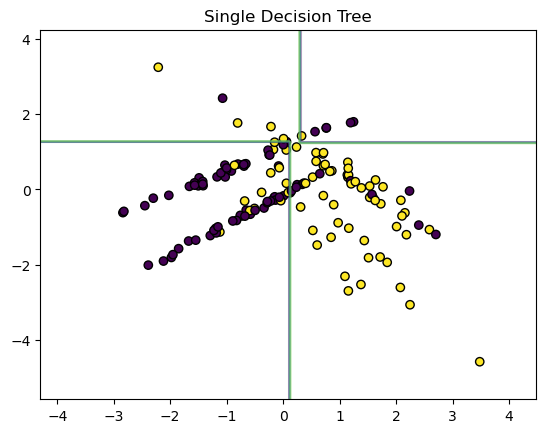

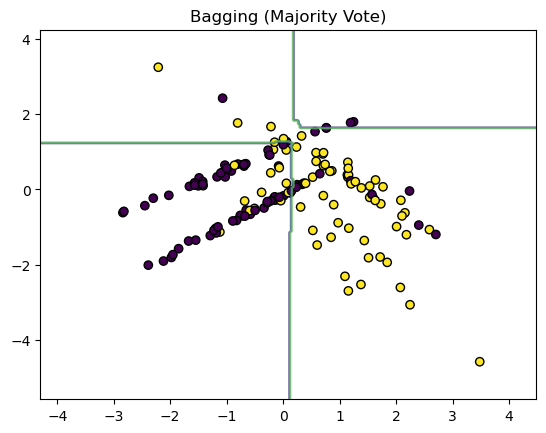

In [17]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Small and Noisy dataset
X,y = make_classification(
    n_samples = 500,
    n_features = 2,
    n_informative = 2,
    n_redundant =0 ,
    flip_y = 0.2,
    class_sep = 0.7,
    random_state= 42
)

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,
                                                   random_state=42)

# Bootstrap Sampling 
def bootstrap_sample(X,y):
    n_samples = X.shape[0]
    indices = np.random.choice(n_samples,size=n_samples, replace=True)
    return X[indices], y[indices]

# Train multiple models on bootstrap samples
n_models = 25
models = []

for i in range(n_models):
    X_boot,y_boot = bootstrap_sample(X_train,y_train)
    
    tree = DecisionTreeClassifier(max_depth=3)
    tree.fit(X_boot,y_boot)
    
    models.append(tree)
    
# Make prediction for each model 
def bagging_predict(models,X):
    all_predictions = []
    
    for model in models:
        preds = model.predict(X)
        all_predictions.append(preds)
        
    return np.array(all_predictions)

# print(n_models,n_samples)

# Majority voting (aggregation)
def majority_vote(predictions):
    final_preds = []
    
    for i in range(predictions.shape[1]):
        values, counts = np.unique(predictions[:,i],return_counts=True)
        final_preds.append(values[np.argmax(counts)])
        
    return np.array(final_preds)


# Evaluate bagging vs single model
# Single decision tree

single_tree = DecisionTreeClassifier(max_depth=3)
single_tree.fit(X_train,y_train)
y_pred_single = single_tree.predict(X_test)

acc_single =accuracy_score(y_test,y_pred_single)
print("Single Tree Accuracy: ", acc_single)

# Bagging model
all_preds = bagging_predict(models,X_test)
y_pred_bagging = majority_vote(all_preds)

acc_bagging = accuracy_score(y_test,y_pred_bagging)
print("Bagging Accuracy: ", acc_bagging)

# Visualizing decision boundary
def plot_boundary(model_prdict, title):
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1    
    
    xx,yy = np.meshgrid(
        np.linspace(x_min,x_max,300),
        np.linspace(y_min,y_max,300)
    )
    
    grid = np.c_[xx.ravel(),yy.ravel()]
    Z = model_prdict(grid)
    Z = Z.reshape(xx.shape)
    
    plt.contour(xx,yy,Z,alpha=0.3)
    plt.scatter(X_test[:,0],X_test[:,1],c=y_test,edgecolor="k")
    plt.title(title)
    plt.show()
    
# Single Tree boundary 
plot_boundary(single_tree.predict, "Single Decision Tree")

# Bagging Boundary 
plot_boundary(
    lambda X: majority_vote(bagging_predict(models,X)),
    "Bagging (Majority Vote)"
)

| Aspect      | Single Tree | Bagging          |
| ----------- | ----------- | ---------------- |
| Variance    | High        | Reduced          |
| Overfitting | Common      | Less             |
| Stability   | Poor        | Strong           |
| Accuracy    | Lower       | Higher (usually) |
| Complexity  | Simple      | Higher           |


### Practice extensions 
- Change n_models → 5, 10, 50
- Increase tree depth and observe overfitting
- Implement out-of-bag error
- Modify code for regression (average instead of vote)